Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


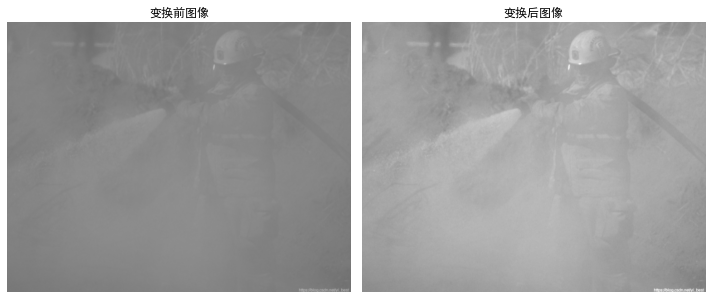

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 读取图像
image_path = '1635914839370077819.jpg'
original_image = Image.open(image_path)

# 将图像转换为numpy数组
original_array = np.array(original_image)

# 定义分段线性变换函数
def piecewise_linear_transform(pixel_value):
    if pixel_value < 100:
        return 0.5 * pixel_value
    elif 100 <= pixel_value < 200:
        return 2 * (pixel_value - 100) + 100
    else:
        return 0.5 * (pixel_value - 200) + 300

# 对图像进行分段线性变换
transformed_array = np.vectorize(piecewise_linear_transform)(original_array)

# 创建画布和子图
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 显示变换前图像
axes[0].imshow(original_array, cmap='gray')
axes[0].set_title('变换前图像')

# 显示变换后图像
axes[1].imshow(transformed_array, cmap='gray')
axes[1].set_title('变换后图像')

# 显示中文标题
axes[0].set_title('变换前图像', fontproperties='SimHei', fontsize=12)
axes[1].set_title('变换后图像', fontproperties='SimHei', fontsize=12)

# 隐藏坐标轴
for ax in axes:
    ax.axis('off')

# 调整子图之间的间距
plt.tight_layout()

# 显示图像
plt.show()


In [6]:
import cv2
import matplotlib.pyplot as plt 
# 1. 读取图片，转灰度图
input_image_path = "car.jpg"
output_image_path = "binary.jpg"

image = cv2.imread(input_image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2. 提取轮廓
sobelx = cv2.Sobel(gray, cv2.CV_16S, 1, 0, ksize=3)
abs_sobelx = cv2.convertScaleAbs(sobelx)

# 3. 二值化处理
_, binary = cv2.threshold(abs_sobelx, 0, 255, cv2.THRESH_OTSU)

# 4. 保存图像
cv2.imwrite(output_image_path, binary)

cv2.imshow("binary", binary)
cv2.imshow ("gray", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()


【问题描述】对输入的彩色图像分别进行最大值灰度处理、平均灰度处理和加权平均灰度处理，并将三种结果的灰度值分别乘以0.25、0.25、0.5后进行融合。得到输出结果图像result.jpg。

In [1]:
import cv2
import numpy as np

# 读取原始图像
img = cv2.imread('bri.jpg')

# 获取图像高度和宽度
height = img.shape[0]
width = img.shape[1]

# 图像最大值灰度处理
max_gray = np.max(img, axis=2)

# 图像平均灰度处理方法
avg_gray = np.mean(img, axis=2)

# 图像加权灰度化处理方法
weighted_gray = 0.3 * img[:, :, 0] + 0.59 * img[:, :, 1] + 0.11 * img[:, :, 2]

# 图像融合和保存
result = 0.25 * max_gray + 0.25 * avg_gray + 0.5 * weighted_gray
result = result.astype(np.uint8)

cv2.imwrite('result.jpg', result)


True